In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

In [2]:
df=pd.read_csv("C:/Users/Expert/Downloads/dataset_21_car.csv - dataset_21_car.csv.csv")

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,4,big,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [28]:
le=LabelEncoder()
df['buying']=le.fit_transform(df['buying'])
df['maint']=le.fit_transform(df['maint'])
df['lug_boot']=le.fit_transform(df['lug_boot'])
df['safety']=le.fit_transform(df['safety'])
df['class']=le.fit_transform(df['class'])
df['doors']=le.fit_transform(df['doors'])
df['persons']=le.fit_transform(df['persons'])

In [29]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [30]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [31]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

In [32]:
import seaborn as sns

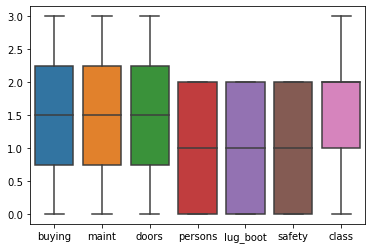

In [33]:
sns.boxplot(data=df)

In [34]:
df.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


In [35]:
x=df.drop(columns=["class"])

# K-Means Clustering

In [36]:
from sklearn.cluster import KMeans
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Inertia')

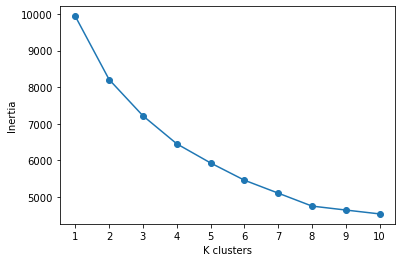

In [37]:
plt.plot(k,ssd,marker="o")
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

In [38]:
model=KMeans(n_clusters=8)
model.fit(x)

KMeans()

Text(0, 0.5, 'Feature 2')

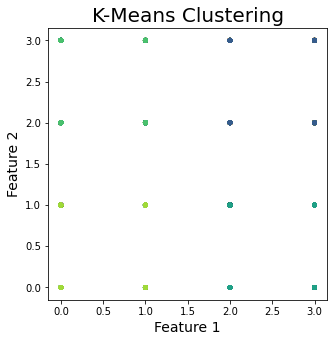

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(df["buying"],df["maint"],c=model.labels_,s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

In [43]:
df["labels_grp"]=model.labels_

In [44]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class,labels_grp
0,3,3,0,0,2,1,2,7
1,3,3,0,0,2,2,2,7
2,3,3,0,0,2,0,2,7
3,3,3,0,0,1,1,2,7
4,3,3,0,0,1,2,2,7


# Hierarchical Agglomerative Clustering

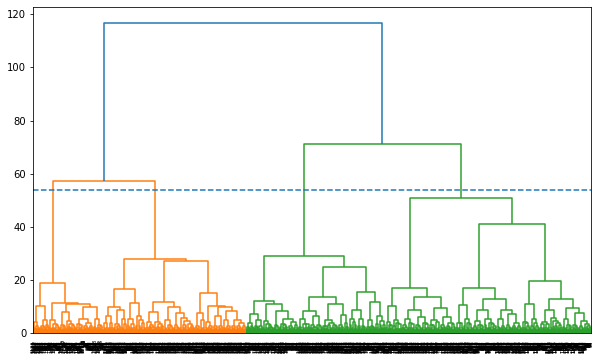

In [48]:
from scipy.cluster import hierarchy
fig=plt.figure(figsize=(10,6))
den=hierarchy.dendrogram(hierarchy.linkage(df,method='ward'))
plt.axhline(y=54,linestyle="--")

In [50]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4)
model.fit(x)

AgglomerativeClustering(n_clusters=4)

Text(0, 0.5, 'Feature 2')

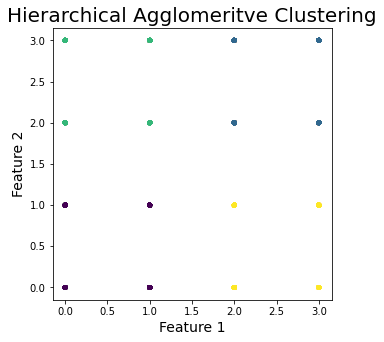

In [51]:
plt.figure(figsize=(5,5))
plt.scatter(df["buying"],df["maint"],c=model.labels_,s=15)
plt.title('Hierarchical Agglomeritve Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

# DBScan

In [53]:
df=x[["buying","maint"]]

In [54]:
df.head()

,buying,maint
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3


In [55]:
#min points Dim+1 => 2+1=3

In [56]:
# k- distance plot
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors(n_neighbors=2)
n_fit=n.fit(df)
distance,_=n_fit.kneighbors(df)
distance=np.sort(distance,axis=0)
#print(distance)
distance=distance[:,1]
print(distance)

[0. 0. 0. ... 0. 0. 0.]


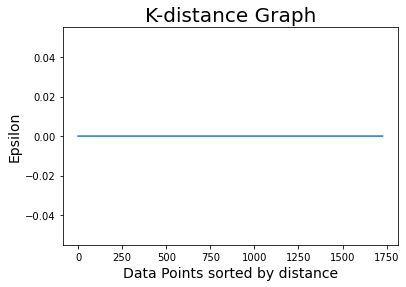

In [58]:
plt.plot(distance)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Text(0, 0.5, 'Epsilon')

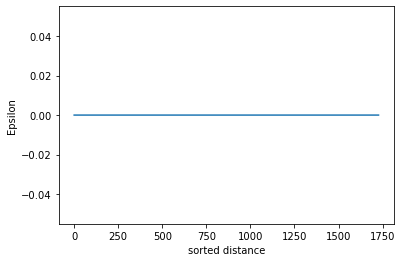

In [59]:
plt.plot(distance)
plt.xlabel("sorted distance")
plt.ylabel("Epsilon")

In [60]:
from sklearn.cluster import DBSCAN
model=DBSCAN(min_samples=3)
model.fit(df)

DBSCAN(min_samples=3)

Text(0.5, 1.0, 'buying vs maint')

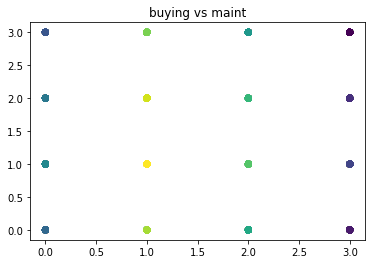

In [62]:
plt.scatter(df['buying'], df['maint'],c=model.labels_)
plt.title("buying vs maint")